<a href="https://colab.research.google.com/github/smarulandas/Teoria_Aprendizaje_De_Maquina_-Machine_Learning-/blob/main/Reduccion_Dimension_2_TALLER_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio 3
1. Consulte en que consiste el algoritmo eigenfaces. Compare el modelo de eigenfaces para reducción de dimensión con el algoritmo PCA. Aplique eigenfaces a Mnist sobre el conjunto X_train y grafique las dos primeras dimensiones con las imagenes originales sobre cada punto proyectado, y presente las cinco primeras "eigenfaces" en dibujo tipo imagen.

### Determinar el número de dimensiones proyectas

El siguiente código calcula PCA sin reducir la dimensionalidad, luego calcula el número mínimo de dimensiones requeridas para preservar el 95% de la variación del conjunto de entrenamiento (se utilizará la base de datos Mnist que tiene 784 dimensiones de entrada).

In [ ]:
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import numpy as np

mnist = keras.datasets.mnist #cargar fashion mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train.reshape(X_train.shape[0], -1)/255.
y = y_train

print(X.shape,y.shape)

(60000, 784) (60000,)


Submuestreo del conjunto de entrenamiento de MNIST

In [ ]:
#se submuestrea para facilidad en cálculos
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.98,random_state=123)
print(X_train.shape,y_train.shape)

(1200, 784) (1200,)


Determinar el número de dimensiones proyectadas

In [ ]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d      = np.argmax(cumsum >= 0.95) + 1 #varianza acumulada ordenando componentes
d

np.int64(135)

También podemos establecer *n_components = d* y ejecutar PCA nuevamente. Sin embargo, hay una opción mucho mejor: en lugar de especificar el número de componentes principales que desea conservar, puede establecer *n_components* para que sea flotante entre 0.0 y 1.0, lo que indica la relación de varianza que desea conservar:

In [ ]:
pca       = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

np.int64(135)

Varianza explicada total con el número de componentes seleccionados

In [ ]:
np.sum(pca.explained_variance_ratio_)

np.float64(0.9503404973326779)

Aplicar PCA con 90% de varianza explicada

In [ ]:
#Ayuda de código
red = PCA(n_components=0.9)
Z = red.fit_transform(X_train)

Función para graficar proyección 2D con imágenes originales

In [ ]:
#graficar 2D con imágenes originales
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
#img_w y img_h representan la resolución original de los datos
def plot_mnist_2d(Z,images,img_w=28,img_h=28,zoom=0.5,cmap='jet'):
    fig, ax = plt.subplots(figsize=(10,6))
    for i in range(Z.shape[0]):
        #print('img',i+1,'/',Z.shape[0])
        image = images[i].reshape((img_w, img_h))
        im = OffsetImage(image, zoom=zoom,cmap=cmap)
        ab = AnnotationBbox(im, (Z[i,0], Z[i,1]), xycoords='data', frameon=False)
        ax.add_artist(ab)
        ax.update_datalim([(Z[i,0], Z[i,1])])
        ax.autoscale()

Visualización de la proyección 2D

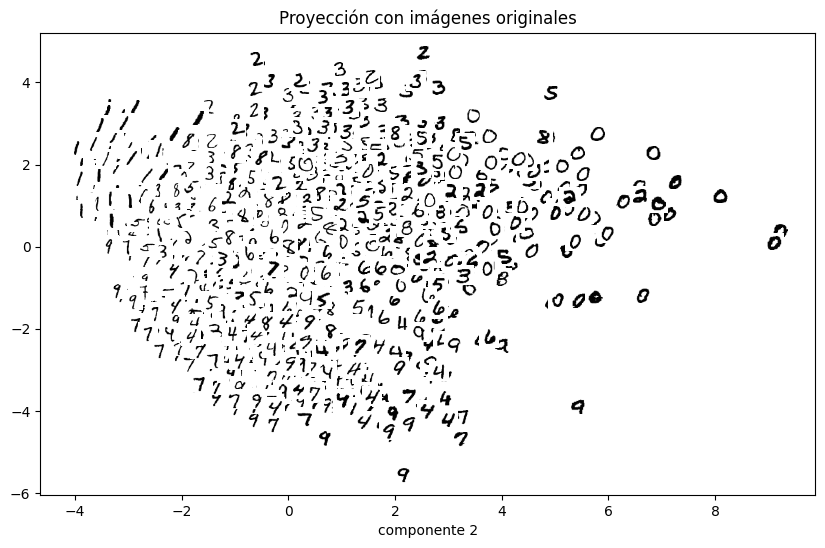

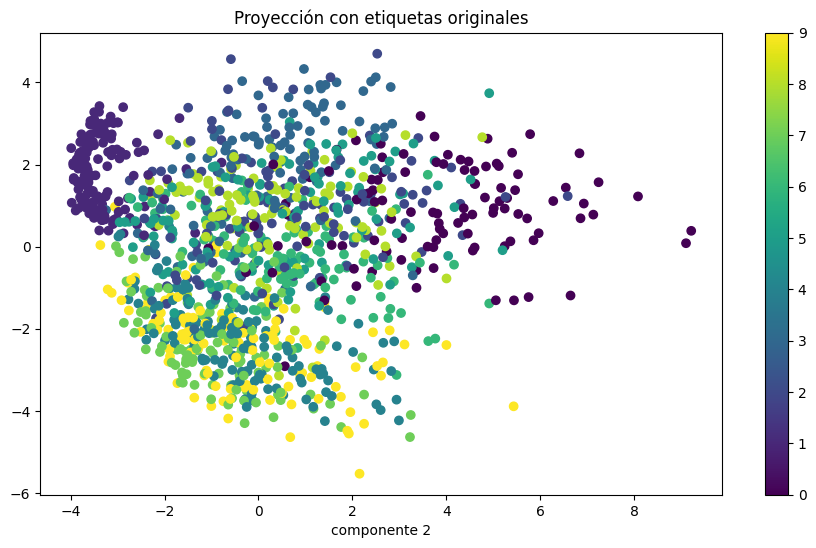

In [ ]:
import matplotlib.pyplot as plt

plot_mnist_2d(Z,X_train,img_w=28,img_h=28,zoom=0.5,cmap='binary')
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con imágenes originales')
plt.show()

plt.figure(figsize=(11,6))
plt.scatter(Z[:,0],Z[:,1],c=y_train)
plt.xlabel('componente 1')
plt.xlabel('componente 2')
plt.title('Proyección con etiquetas originales')
plt.colorbar()
plt.show()

Preparación para visualizar "eigenfaces"

In [ ]:
#graficar componentes como "eigenfaces"
print(red.components_.shape)


(80, 784)


Visualización de las primeras "eigenfaces"

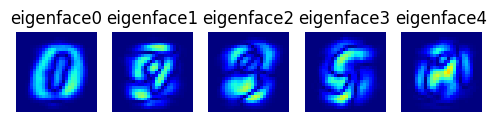

In [ ]:
n_rows = 1
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
#resolución imagenes
img_w = 28
img_h = 28

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(abs(red.components_[index].reshape(img_w,img_h)),
                    vmin=abs(red.components_).min(), vmax=abs(red.components_).max(),cmap="jet", interpolation="nearest")
        plt.axis('off')
        plt.title("eigenface" + str(index), fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
#save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

2. Utilizando la base de datos muestreada Mnist en X_train y y_train, realice una análisis comparativo en términos del coeficiente de silueta del agrupamiento de los datos a 2 dimensiones utilizando kmeans. Considere los métodos: PCA, kernel PCA rbf, t-SNE y UMAP. Utilice la librería RAPIDS a la hora de implementar los algoritmos, en caso de estar disponibles.

In [ ]:
!pip install umap-learn #librería umap
!pip install datashader bokeh holoviews #gráficos umap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 75.9 MB/s eta 0:00:00


##  **Comparación de PCA, KernelPCA, t-SNE y UMAP en MNIST con KMeans**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Submuestreo: (1200, 784)


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:405: UserWarning: Starting from version 22.04, the default method of TSNE is 'fft'.
  return init_func(self, *args, **filtered_kwargs)


[2025-06-12 13:28:04.797] [CUML] [info] build_algo set to brute_force_knn because random_state is given


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:195: FutureWarning: The default value of `n_init` will change from 1 to 'auto' in 25.04. Set the value of `n_init` explicitly to suppress this warning.
  return func(*args, **kwargs)


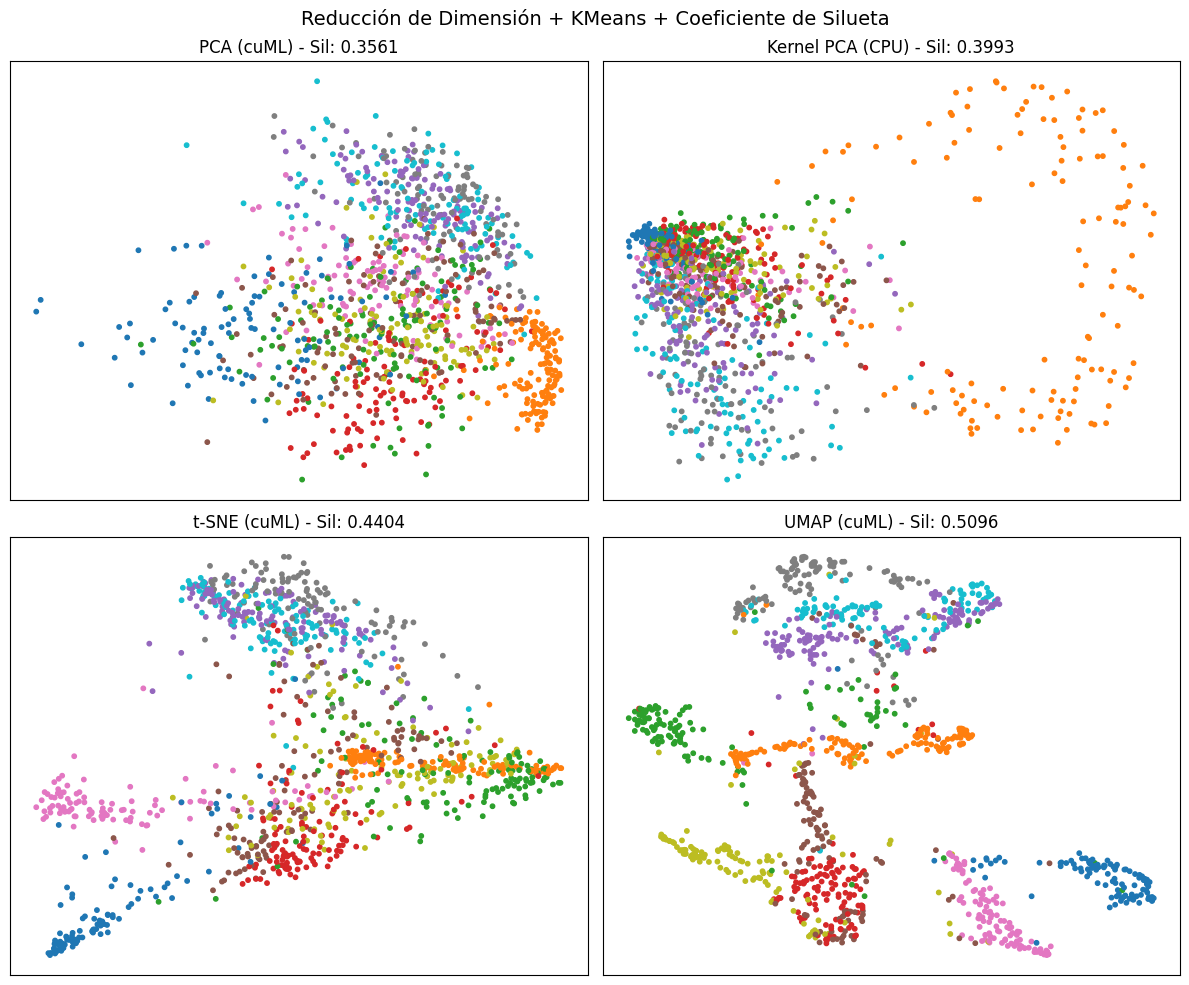

In [1]:
import cupy as cp
import cudf
import numpy as np
import matplotlib.pyplot as plt
from cuml.decomposition import PCA as cuPCA
from cuml.manifold import TSNE as cuTSNE, UMAP as cuUMAP
from cuml.cluster import KMeans as cuKMeans
from sklearn.decomposition import KernelPCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# === 1. Cargar y preparar datos ===
(X_full, y_full), (_, _) = keras.datasets.mnist.load_data()
X = X_full.reshape(X_full.shape[0], -1) / 255.0
y = y_full

# === 2. Submuestreo para aceleración (puedes ajustar tamaño) ===
X_train, _, y_train, _ = train_test_split(X, y, test_size=0.98, random_state=123)
print("Submuestreo:", X_train.shape)

# Convertir a estructuras RAPIDS
X_gpu = cudf.DataFrame(X_train)
X_cpu = X_train  # para KernelPCA y silhouette

# === 3. Reducción de dimensión ===
X_pca   = cuPCA(n_components=2).fit_transform(X_gpu).to_pandas().values
X_kpca  = KernelPCA(n_components=2, kernel='rbf', gamma=0.03).fit_transform(X_cpu)
X_tsne  = cuTSNE(n_components=2, perplexity=10, learning_rate=200, n_iter=1000, random_state=42).fit_transform(X_gpu).to_pandas().values
X_umap  = cuUMAP(n_components=2, random_state=42).fit_transform(X_gpu).to_pandas().values

# === 4. KMeans clustering ===
kmeans = cuKMeans(n_clusters=10, random_state=42)
clusters_pca   = kmeans.fit_predict(X_pca)
clusters_kpca  = kmeans.fit_predict(X_kpca)
clusters_tsne  = kmeans.fit_predict(X_tsne)
clusters_umap  = kmeans.fit_predict(X_umap)

# === 5. Evaluación con coeficiente de silueta ===
sil_pca   = silhouette_score(X_pca, clusters_pca)
sil_kpca  = silhouette_score(X_kpca, clusters_kpca)
sil_tsne  = silhouette_score(X_tsne, clusters_tsne)
sil_umap  = silhouette_score(X_umap, clusters_umap)

# === 6. Visualización con coeficientes en el título ===
titles = [
    f'PCA (cuML) - Sil: {sil_pca:.4f}',
    f'Kernel PCA (CPU) - Sil: {sil_kpca:.4f}',
    f't-SNE (cuML) - Sil: {sil_tsne:.4f}',
    f'UMAP (cuML) - Sil: {sil_umap:.4f}'
]
datasets = [X_pca, X_kpca, X_tsne, X_umap]

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for ax, title, data in zip(axes.ravel(), titles, datasets):
    ax.scatter(data[:, 0], data[:, 1], c=y_train, cmap='tab10', s=10)
    ax.set_title(title)
    ax.set_xticks([]); ax.set_yticks([])

plt.suptitle('Reducción de Dimensión + KMeans + Coeficiente de Silueta', fontsize=14)
plt.tight_layout()
plt.show()

## **Interpretación**

El **coeficiente de silueta** mide qué tan bien separados están los grupos formados por KMeans después de proyectar los datos a 2D. Se interpreta así:

- **Cerca de 1.0**: excelente separación entre grupos.
- **Cerca de 0.0**: los grupos se superponen.
- **Menor a 0**: los datos están mal agrupados.

---

### **¿Qué indican tus resultados?**

- **UMAP** fue la mejor técnica de reducción (0.4954), lo que sugiere que conservó mejor la estructura de agrupamiento de los datos.
- **t-SNE** también lo hizo muy bien (0.4404), como se esperaba (es excelente para visualización).
- **Kernel PCA** (0.3993) superó a **PCA lineal**, lo que indica que la estructura no lineal es relevante en MNIST.
- **PCA** es el más simple y más rápido, pero agrupó peor (0.3561), lo cual también es esperable.